In [1]:
# import the necessary packages

import nltk
import re
import string


In [2]:
# and define helper functions

def lower_tokens(tokens):
    return [token.lower() for token in tokens]

def remove_punctuation_tokens(tokens):
    punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))
    return [a for a,b in zip(tokens, [punct_regex.sub('', token) for token in tokens]) if b != '']

def get_cleaned_tokens(tokens):
    return remove_punctuation_tokens(lower_tokens(tokens))

def remove_stopword_tokens(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stopwords]

def remove_punctuation_in_tokens(tokens):
    punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))
    return [punct_regex.sub('', token) for token in tokens]

def preprocess_sentence(sentence):
    return remove_stopword_tokens(remove_punctuation_in_tokens(get_cleaned_tokens(nltk.word_tokenize(sentence))))

In [3]:
# for this example we'll use the Ward of the Wolds from Gutenberg (copied locally)
with open("wotw.txt") as file:
    wotw_text = file.read()
    
# this prints the first paragraph
section1 = wotw_text[1150:2481]
section1

"No one would have believed in the last years of the nineteenth century\nthat this world was being watched keenly and closely by intelligences\ngreater than man's and yet as mortal as his own; that as men busied\nthemselves about their various concerns they were scrutinised and\nstudied, perhaps almost as narrowly as a man with a microscope might\nscrutinise the transient creatures that swarm and multiply in a drop of\nwater. With infinite complacency men went to and fro over this globe\nabout their little affairs, serene in their assurance of their empire\nover matter. It is possible that the infusoria under the microscope do\nthe same. No one gave a thought to the older worlds of space as sources\nof human danger, or thought of them only to dismiss the idea of life\nupon them as impossible or improbable. It is curious to recall some of\nthe mental habits of those departed days. At most terrestrial men\nfancied there might be other men upon Mars, perhaps inferior to\nthemselves and re

In [4]:
# download punkt components

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# word tokenize the entire book

all_tokens = nltk.word_tokenize(wotw_text)

In [6]:
# how many tokens in the whole novel?
len(all_tokens)

69105

In [7]:
# first 20 tokens

all_tokens[:20]

['The',
 'War',
 'of',
 'the',
 'Worlds',
 'by',
 'H.',
 'G.',
 'Wells',
 "'But",
 'who',
 'shall',
 'dwell',
 'in',
 'these',
 'worlds',
 'if',
 'they',
 'be',
 'inhabited']

In [8]:
# import the FreqDist module

from nltk.probability import FreqDist

In [9]:
# create a frequency distribution for all our tokens

fdist = FreqDist(all_tokens)

In [10]:
# check the number of tokens.  This will be the number of unique tokens identified

len(set(all_tokens))

7591

In [11]:
# while can also be found this way

len(fdist)

7591

In [12]:
# retrieves those two values explecitly

fdist.N(), fdist.B()

(69105, 7591)

In [13]:
# this shows a summary of the frequency distribution

fdist

FreqDist({'the': 4399, ',': 4132, '.': 3113, 'and': 2355, 'of': 2283, 'a': 1525, 'I': 1287, 'to': 1157, 'in': 916, 'was': 851, ...})

In [14]:
# easy to get the 10 most common tokens and their frequency

fdist.most_common(10)

[('the', 4399),
 (',', 4132),
 ('.', 3113),
 ('and', 2355),
 ('of', 2283),
 ('a', 1525),
 ('I', 1287),
 ('to', 1157),
 ('in', 916),
 ('was', 851)]

In [15]:
# a slice can get us the last 10

fdist.most_common()[-10:]

[('gibber', 1),
 ('fiercer', 1),
 ('paler', 1),
 ('uglier', 1),
 ('distortions', 1),
 ('haunting', 1),
 ('mockery', 1),
 ('beds', 1),
 ('sight-seers', 1),
 ('clear-cut', 1)]

In [16]:
# get the frequency of a specific term
fdist.freq('the')

0.06365675421460097

In [17]:
# and another

fdist.freq('gibber')

1.4470732942623544e-05

In [18]:
# check the percentage matches

fdist.get("the") / fdist.N()

0.06365675421460097

In [19]:
# let's visualize this distribution

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
fdist.plot(40, cumulative=False)
plt.show()

<Figure size 1200x800 with 1 Axes>

In [20]:
# find all tokens that only occur once

used_once = [item[0] for item in fdist.items() if item[1]==1]
used_once[:10]

['War',
 'Worlds',
 'H.',
 'G.',
 'Wells',
 "'But",
 'dwell',
 'inhabited',
 'Lords',
 'World']

In [21]:
# and see how many there are

len(used_once)

3852

In [22]:
# find all tokens that have a count < 4

least_common = [item[0] for item in fdist.items() if item[1]<4]
len(least_common)

5705

In [23]:
# or 4 or more

not_least_common = [item[0] for item in fdist.items() if item[1]>=4]
len(not_least_common)

1886

In [24]:
# sample 10 of them

not_least_common[:10]

['The', 'of', 'the', 'by', 'who', 'shall', 'in', 'these', 'if', 'they']

In [25]:
# a variant of the preprocess_sentence to work on tokens only

def preprocess_tokens(tokens):
    return remove_stopword_tokens(remove_punctuation_in_tokens(get_cleaned_tokens(tokens)))

In [26]:
# now let's load stopword components

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# now let's process all the tokens we got before

wotw_preprocessed = preprocess_tokens(all_tokens)

In [28]:
len(wotw_preprocessed)

29662

In [29]:
# note we really remove quite a few tokens just with stopwords

len(all_tokens)

69105

In [30]:
# now let's look at the frequency distribution of this new set

fdist2 = FreqDist(wotw_preprocessed)
fdist2

FreqDist({'one': 197, 'upon': 171, 'said': 166, 'martians': 165, 'people': 158, 'came': 150, 'saw': 131, 'towards': 129, 'man': 125, 'time': 121, ...})

In [31]:
# and check the count and number of bins

fdist2.N(), fdist2.B()

(29662, 6953)

In [32]:
# check the top 10

fdist2.most_common(10)

[('one', 197),
 ('upon', 171),
 ('said', 166),
 ('martians', 165),
 ('people', 158),
 ('came', 150),
 ('saw', 131),
 ('towards', 129),
 ('man', 125),
 ('time', 121)]

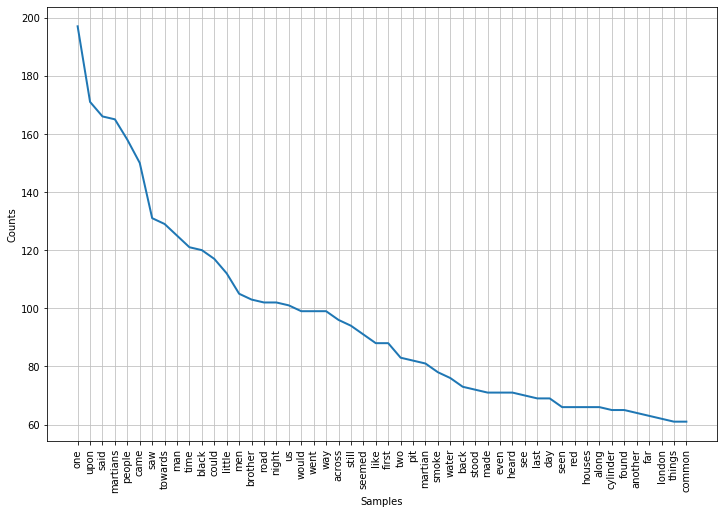

In [33]:
# and visualize it

fig, ax = plt.subplots(figsize=(12, 8))
fdist2.plot(50, cumulative=False)
plt.show()

In [34]:
# ten least common

fdist2.most_common()[-10:]

[('gibber', 1),
 ('fiercer', 1),
 ('paler', 1),
 ('uglier', 1),
 ('distortions', 1),
 ('haunting', 1),
 ('mockery', 1),
 ('beds', 1),
 ('sightseers', 1),
 ('clearcut', 1)]

In [35]:
# How many are used < 4 times?

least_common = [item[0] for item in fdist2.items() if item[1]<4]
len(least_common)

5288

In [36]:
# all used 4 or more times, and check the cournt

most_common = [item[0] for item in fdist2.items() if item[1]>=4]
len(most_common)

1665

In [37]:
most_common[:10]

['war',
 'shall',
 'world',
 'things',
 'made',
 'man',
 'book',
 'coming',
 'martians',
 'ii']